## Employee Departure Forecast

## Importing libraries 

<pre>
Pandas    -To import employee data and handle it.
Numpy     -To manage columns of dataset and it's operations.
Matplotlib-To analyze and visualize relationship of attributes.
</pre> 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

## Importing data of employee requred for project.

This data represent employee's various attribute of information such as satisfaction level,monthly working hours,work accident,number of project,promotions,salary,department ect.

These attrubutes are as follows

In [2]:
data=pd.read_csv("../Data/employeeInfo.csv")
print(data.shape)
data.head(3)

(14999, 9)


,satisfaction_level,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,2,157,3,0,1,0,sales,low
1,0.80,5,262,6,0,1,0,sales,medium
2,0.11,7,272,4,0,1,0,sales,medium


### Outlinear's and Ranges of attributes

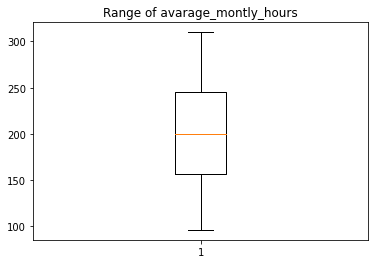

In [3]:
plt.boxplot(data['average_montly_hours'])
plt.title('Range of avarage_montly_hours')
plt.show()

Monthly working hour dataset does not have any outliners and all instances are almost equally distrubuted.

### Importing seaborn library 

Seaborn is python library that use for the visualize the data and undertand the relationship between attributes of employee.

In [4]:
import seaborn as sns

## Visualize data and Explore relationships

Let us consider the attribute 'left' represent employee left or not from organization,'satisfaction level' that represent satisfaction of employee and 'time_spend_company' represent the daily working hours of the employee.

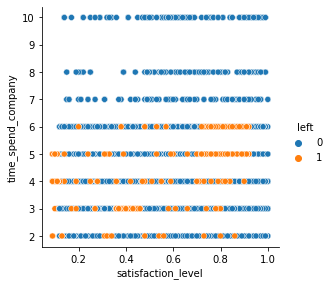

In [5]:
sns.pairplot(data,hue='left',x_vars='satisfaction_level',y_vars='time_spend_company',height=4)
plt.show()

From above graph we can conclude that employee who spent time more or equal to seven hours does not leave job and it is independent of any other attributes.

Also Satisfaction level greater then 0.95 does not leave their job.

Let us consider the attributes 'left,' 'satisfaction level,' and 'number of projects' for visualization

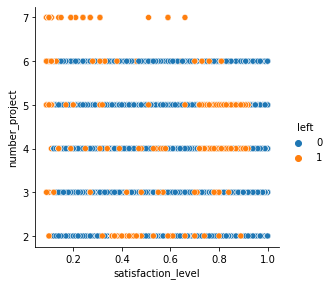

In [6]:
sns.pairplot(data,hue='left',x_vars='satisfaction_level',y_vars='number_project',height=4)
plt.show()

From the above pairplot, we can observe that as workload increases, employees tend to quit their jobs.

If the number of projects is greater than six, then employees definitely quit their jobs.

Let us consider feature left, promotion and satisfaction level

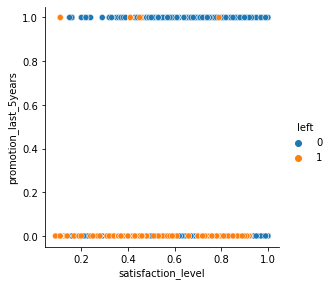

In [7]:
sns.pairplot(data,hue='left',x_vars='satisfaction_level',y_vars='promotion_last_5years',height=4)
plt.show()

It concludes that promotion is a major key factor that affects employees' decisions. Most employees who are not promoted depart from the job, yet most of the promoted employees do not quit their jobs.

Let us consider that attributes 'left', 'satisfaction_level' and 'department' to analyze them.

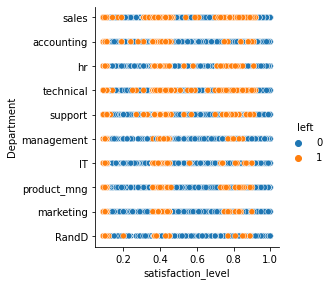

In [8]:
sns.pairplot(data,hue='left',x_vars='satisfaction_level',y_vars='Department',height=4)
plt.show()

From above pairplot we can conclude that their department of employee does not effect the decision of employee.Thus department does not include in predictiong attributes.

Let use consider 'left','satisfaction level' and 'salary' attribute to undertand relationship

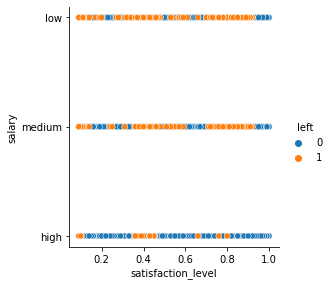

In [9]:
sns.pairplot(data,hue='left',x_vars='satisfaction_level',y_vars='salary',height=4)
plt.show()

From the above pairplot, we can conclude that salary also impacts employees' decisions. Employees who receive low salaries have a higher chance of quitting their jobs.

### Conclustion:

#### Dependent variable

satisfaction_level:
    Employee have satisfaction level greater then .95 does not quit job.

time_spent_company/monthly_spending_time:
    Employee spent time more then six hour in company does not quit job.

Number of project:
    Employee work in more then six project will have high change that employee quit job.

Promotion:
    Promoted employee does not quit job easily.High change that they be with company.

Salary: 
    Most of the employee having low salaries that quit their jobs.

#### Independent variable

Department:
    Decision of employee does not affected by department of employee



### Classify data

Let us divide data into X and Y dataframe where X contain all predicting factor i.e factor that affect output and Y contain target variable

In [10]:
X=data.drop(columns=['Department','left'])
Y=data['left']

In [11]:
X.columns

Index(['satisfaction_level', 'number_project', 'average_montly_hours',
       'time_spend_company', 'Work_accident', 'promotion_last_5years',
       'salary'],
      dtype='object')

### Encoding attributes

Salay attribute is in format of categorical data.Thus this data have to encoding and added to X dataset.

In [12]:
X=X.join(pd.get_dummies(data[['salary']]))
X=X.drop(columns=['salary'])
X.head(3)

,satisfaction_level,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,2,157,3,0,0,0,1,0
1,0.80,5,262,6,0,0,0,0,1
2,0.11,7,272,4,0,0,0,0,1


### MIN-Max Scaler

Avarage monthly salay and number of project have very high value thus sometime it may cause problem in algorithm like KNN thus using min-max scalre normalizing these values.

In [13]:
X_dataset=X
X_dataset['time_spend_company']=X_dataset['time_spend_company']/10
X_dataset['average_montly_hours']=X_dataset['average_montly_hours']/(31*10)
X_dataset['number_project']=X_dataset['num_projects']/10
X_dataset.head(3)

KeyError: 'num_projects'

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_dataset,Y,test_size=0.15,random_state=10)

In [ ]:
pd.value_counts(Y_train)

0    9715
1    3034
Name: left, dtype: int64

In [ ]:
from imblearn.over_sampling import  SMOTE
smote=SMOTE(sampling_strategy='auto',random_state=0)

In [ ]:
X_resample,Y_resample=smote.fit_resample(X_train,Y_train)

In [ ]:
pd.value_counts(Y_resample)

1    9715
0    9715
Name: left, dtype: int64

## Model selection 

Their are various classifier are available to classify these data i.e employees-

1-Logistic regression

2-Decision tree 

3-Support vector machine 

4-KNN(k-Nearest Neighbors)

### Logistic Regression Model

In [ ]:
from sklearn.metrics import  confusion_matrix

In [ ]:
from sklearn.linear_model import  LogisticRegression

model1=LogisticRegression()

model1.fit(X_resample,Y_resample)

Y_pred=model1.predict(X_test)

confusion_matrix(Y_test,Y_pred)

array([[1272,  441],
       [ 124,  413]], dtype=int64)

### Support vector Machine

In [ ]:
from sklearn.svm import  SVC

model2=SVC()

model2.fit(X_resample,Y_resample)

Y_pred=model2.predict(X_test)

confusion_matrix(Y_test,Y_pred)


array([[1502,  211],
       [  71,  466]], dtype=int64)

### Decision Tree algorithm

In [ ]:
from sklearn.tree import  DecisionTreeClassifier

model3=DecisionTreeClassifier()

model3.fit(X_resample,Y_resample)

Y_pred=model3.predict(X_test)

confusion_matrix(Y_test,Y_pred)

array([[1685,   28],
       [  35,  502]], dtype=int64)

In [ ]:
from sklearn.neighbors import  KNeighborsClassifier

model4=KNeighborsClassifier()

model4.fit(X_resample,Y_resample)

Y_pred=model4.predict(X_test)

confusion_matrix(Y_test,Y_pred)

array([[1639,   74],
       [  31,  506]], dtype=int64)

From above performance of diffrent model it observed that performance of decision tree algorithm is higher then other algorithm. Also while analyzing dataset it observed that target variable is depend upon various desion of predicting variable such as number of project, working hours and other various factor.

Also KNN algorithm is time consuming algorithm.Hence we can use Decision algorithm for real time prediction and deployment.

### Fromation of .pkl Modul

In [ ]:
import joblib 

path="../Model/algo.pkl"

joblib.dump(model3,path)

['../Model/algo.pkl']